# 2021-01-13 • Multiple ROC's

Here we repeat the simulation multiple times (each time varying one parameter), and for each repetition calculate an ROC curve (and associated area under that curve): how well could we classify all (spike_train, VI_signal)-pairs as connected or unconnected, for a range of p-value thresholds?

## Setup

In [1]:
from voltage_to_wiring_sim.notebook_init import *

Preloading: numpy, numba, matplotlib.pyplot, seaborn.
Importing from submodules … ✔
Imported `np`, `mpl`, `plt`, `sns`
Imported codebase (`voltage_to_wiring_sim`) as `v`
Imported `*` from `v.support.units`
Setup autoreload


In [2]:
v.print_reproducibility_info()

This cell was last run by `tfiers` on `yoga`<br>on **Wed 13 Jan** 2021, at 21:12 (UTC+0100).

[Last git commit](https://github.com/tfiers/voltage-to-wiring-sim/tree/b21d47debc937fddc08145f01a90d2f37a0e88df
) (Mon 11 Jan 2021, 19:34).

Uncommited changes to:
```
 M codebase/voltage_to_wiring_sim/N_to_1_experiment.py
 M codebase/voltage_to_wiring_sim/__init__.py
?? notebooks/2021-01-13__multiple_ROC.ipynb
```

In [8]:
from voltage_to_wiring_sim.N_to_1_experiment import N_to_1_SimParams, simulate, sim_and_eval, plot

In [4]:
from voltage_to_wiring_sim.sim.neuron_params import cortical_RS

## Base parameters

In [15]:
time_grid = v.TimeGrid(
    duration = 5 * minute,
    timestep = 0.1 * ms
)

sim_params = N_to_1_SimParams(
    time_grid=time_grid,
    num_spike_trains = 30,
    p_connected = 0.5,
    spike_rate = 20 * Hz,
    Δg_syn = 0.8 * nS,
    τ_syn = 7 * ms,
    neuron_params = cortical_RS,
    imaging_spike_SNR = 4,
);

In [16]:
sim_data = simulate(sim_params);

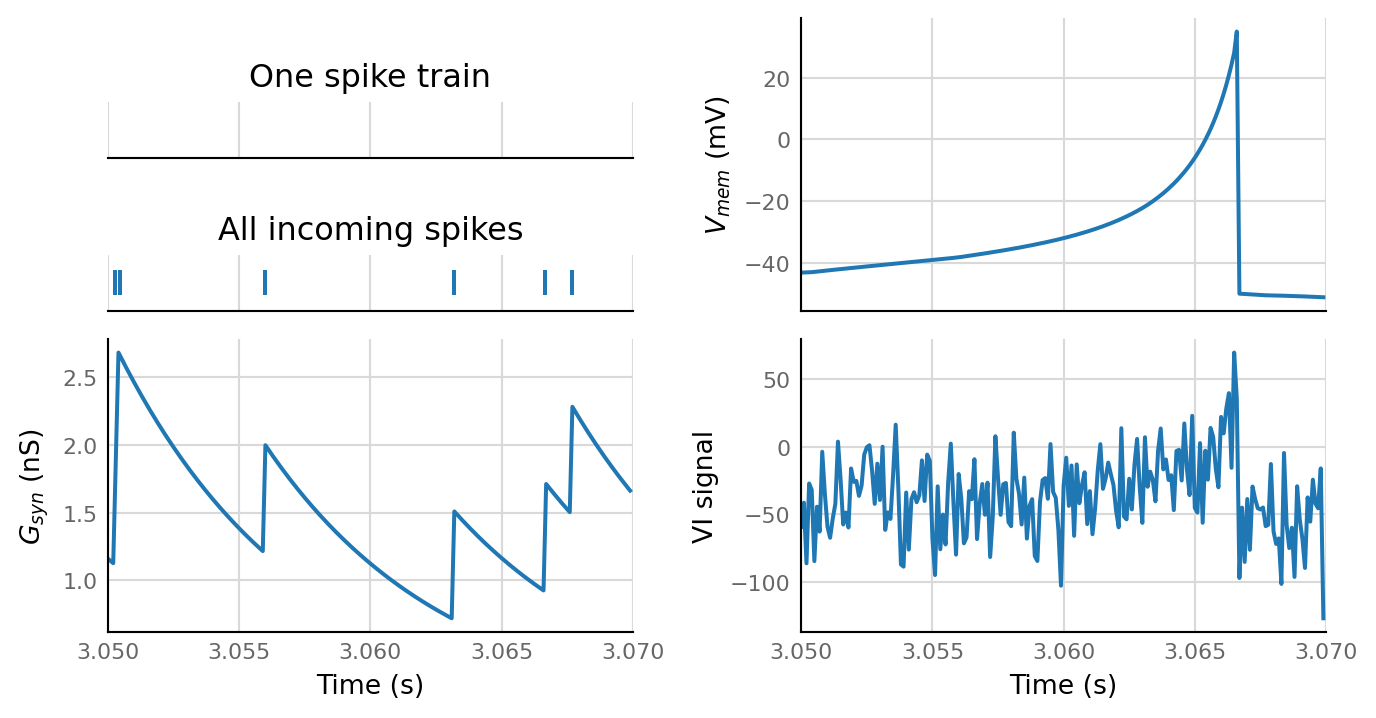

In [20]:
plot(sim_data, time_grid.zoom(start=3.05 * second, duration=.02 * second))